In [2]:
# Data Manipulattion
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dependencies
%matplotlib inline

In [3]:
# Read and preview the train data from csv file.
train = pd.read_csv('Titanic/titanic_train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# Read and preview the test data from csv file.
test = pd.read_csv('Titanic/titanic_test.csv')
train.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.
merged = pd.concat([train,test], sort = False)
merged.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# Let's see the shape of the combined data
merged.shape

(1309, 12)

In [7]:
# variable in the combined data
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Here comes the description of all variables:
- PassengerId is a unique identifying number assigned to each passenger.
- Survived is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
- Pclass is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- Name is the name of the passenger.
- Sex indicates the gender of the passenger (i.e., Male or female).
- Age indicates the age of the passenger.
- Sibsp is the number of siblings/spouses aboard.
- Parch is the number of parents/children aboard.
- Ticket indicates the ticket number issued to the passenger.
- Fare indicates the amount of money spent on their ticket.
- Cabin indicates the cabin category occupied by the passenger.
- Embarked indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).

#### Here, Survived is the target variable and rest of the variables are predictor variables.

### Variable Data Types 

In [8]:
# data types of different variables
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB



- Three float variables: - Age, Fare, and Survived.
- Four int variables: - Pclass, SibSp, Parch and PassengerId
- Five Object(number+strings) variables: - Name, Sex, Ticket, Cabin, and Embarked.

In [9]:
# Description of the data variables
merged.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### Missing Variables

<AxesSubplot:>

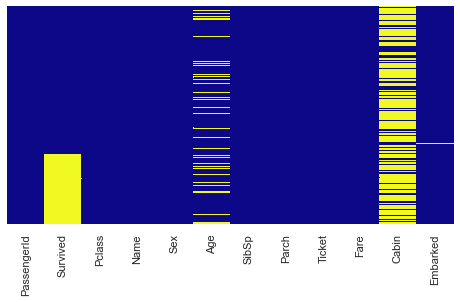

In [10]:
# Visualization of Missing variables
plt.figure(figsize=(8,4))
sns.heatmap(merged.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [11]:
# Count of missing variables
merged.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- Survived column is showing missing values becuase in test.csv don't have the survived column.
- Age, Cabin, Fare and Embarked has missing values.

In [12]:
# Let's manully understand the Cabin column.
print(merged['Cabin'].value_counts().sum())
merged['Cabin'].value_counts().head()

295


C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F4                 4
Name: Cabin, dtype: int64

- Cabin is alphanumeric type variable with no special characters (like ., /, % etc) between letters and numbers.
- It has also 1014 missing obsevations.
- It is reasonable to presume that those NaNs didn't have a cabin.
- We will flag NaN as 'X' and keep only the 1st character where Cabin has alphanumeric values.

In [13]:
# let's fill all NaNs of cabin as 'X'
merged['Cabin'].fillna(value = 'X', inplace=True)

In [14]:
# Keeping 1st charater from the Cabin
merged['Cabin'] = merged['Cabin'].apply(lambda x: x[0])
merged['Cabin'].value_counts()


X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [15]:
#Let's see the Name column.
merged['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [16]:
merged['Title'] = merged['Name'].str.extract('([A-Za-z]+)\.')

In [17]:
merged['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object

In [18]:
# let's see the different categories of Title from Name column.
merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Mme           1
Sir           1
Don           1
Countess      1
Lady          1
Capt          1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

- We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets.
- Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket.
- Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats.
- We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

In [19]:
# Replacing  Dr, Rev, Col, Major, Capt with 'Officer'
merged['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace=True)

# Replacing Dona, Jonkheer, Countess, Sir, Lady with 'Aristocrate'
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#  Replace Mlle and Ms with Miss. And Mme with Mrs.
merged['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [20]:
# let's see how Tittle looks now
merged['Title'].value_counts()


Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

In [21]:
# Merging Sibsp and Parch and creating new variable called 'Family_size'
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
merged['Family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

- We see there are several family sizes with the very least frequency like 2,3 and some have large frequency 7,8,11
- We will create 4 buckets namely single, small, medium, and large for rest of them.

In [22]:
# Create buckets of single, small, medium, and large and then put respective values into them.
merged['Family_size'].replace(to_replace = [1], value = 'single', inplace = True)
merged['Family_size'].replace(to_replace = [2,3], value = 'small', inplace = True)
merged['Family_size'].replace(to_replace = [4,5], value = 'medium', inplace = True)
merged['Family_size'].replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

In [23]:
# let's see how 'Family_size' looks now
merged['Family_size'].value_counts()

single    790
small     394
medium     65
large      60
Name: Family_size, dtype: int64

In [24]:
# let's preview the Ticket variable.
merged['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

- Ticket variable contains alphanumeric, only numbers and character type variables.
- We will create two groups-one will contain just number and other will only contain character extracted from string.
- And assign 'N' to the number type variable.
- If a row contains both character and number, we will keep only character.

In [25]:
# Assign N if there is only number and no character. If there is a character, extract the character only.
ticket = []
for x in list(merged['Ticket']):
    if x.isdigit():
        ticket.append('N')
    else:
         ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
# Swap values
merged['Ticket'] = ticket

In [26]:
# Let's count the categories in  Ticket
merged['Ticket'].value_counts()

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
SOC          8
C            8
SOPP         7
STONO2       7
SCAH         5
SCParis      5
LINE         4
WEP          4
PP           4
SOTONO2      3
FC           3
SWPP         2
PPP          2
SC           2
SCA4         2
SCOW         1
LP           1
A            1
Fa           1
AQ3          1
SCA3         1
CASOTON      1
AS           1
AQ4          1
STONOQ       1
SOP          1
SP           1
Name: Ticket, dtype: int64

In [27]:
# Keeping only the 1st character to reduce the Ticket categories
merged['Ticket'] = merged['Ticket'].apply(lambda x : x[0])
merged['Ticket'].value_counts()

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

# Outliers Detection

##### We will use IQR method to detect the outliers for variable Age and Fare though we won't remove them.

In [28]:
# Create a function to count total outliers.
def outliers(variable):
    global filtered # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

In [29]:
# Total number of outliers in Fare
outliers(merged['Fare'])

Total Outliers of Fare : 171


Text(0.5, 1.0, 'Fare distribution with outliers')

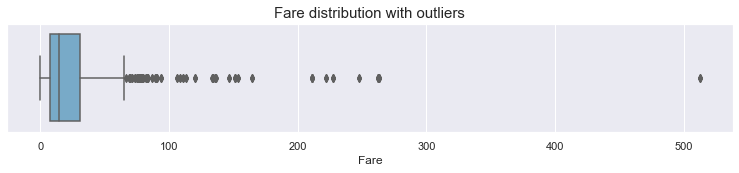

In [30]:
# Visualisation of Fare distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["Fare"],palette='Blues')
plt.title('Fare distribution with outliers', fontsize=15 )

Text(0.5, 1.0, 'Fare distribution without outliers')

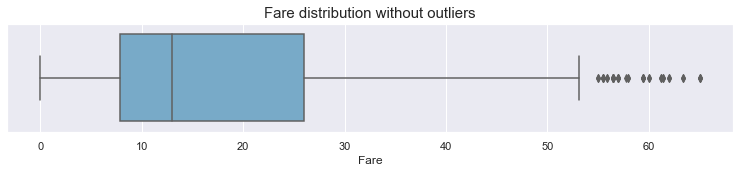

In [31]:
# Visualisation of Fare distribution without outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('Fare distribution without outliers', fontsize=15 )

In [32]:
# Total number of outliers in Age
outliers(merged['Age'])

Total Outliers of Age : 9


Text(0.5, 1.0, 'Age distribution with outliers')

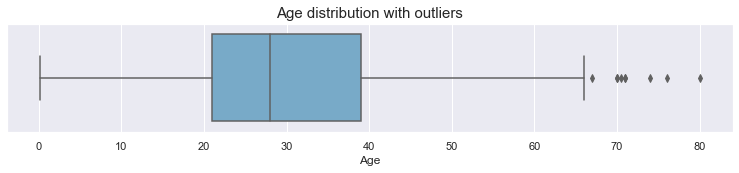

In [33]:
# Visualisation of Age distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["Age"],palette='Blues')
plt.title('Age distribution with outliers', fontsize=15)

In [34]:
# let's count the missing values for each variable
merged.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

- Survived column is showing missing values becuase in test.csv don't have the survived column.
- Age, Cabin, Fare and Embarked has missing values.

### Imputing Embarked and Fare 

In [35]:
# imputing Embarked with mode because Embarked is a categorical variable.
merged['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [36]:
# Here S is the most frequent
merged['Embarked'].fillna(value = 'S', inplace = True)

In [37]:
# Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged['Fare'].fillna(value = merged['Fare'].median(), inplace = True)

### Impute Age 
To impute Age with grouped median, we need to know which features are heavily correlated with Age. Let's find out the variables correlated with Age.

In [38]:
# Let's plot correlation heatmap to see which variable is highly correlated with Age. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical.
df = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head(2)

,Sex,Pclass,Embarked,Title,Family_size,Parch,SibSp,Cabin,Ticket
0,1,2,2,3,3,0,1,8,0
1,0,0,0,4,3,0,1,2,5


In [39]:
# Inserting Age in variable correlation.
df['Age'] = merged['Age']
# Move Age at index 0.
df = df.set_index('Age').reset_index()
df.head(2)

,Age,Sex,Pclass,Embarked,Title,Family_size,Parch,SibSp,Cabin,Ticket
0,22.0,1,2,2,3,3,0,1,8,0
1,38.0,0,0,0,4,3,0,1,2,5


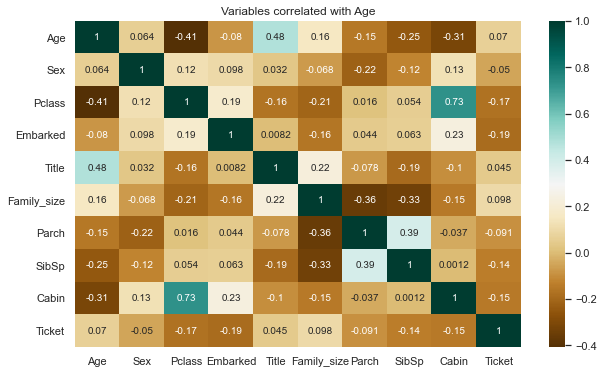

In [40]:
# Now create the heatmap correlation of df
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correlated with Age')
plt.show()

- Sex, Embarked, and Ticket have the weakest correlation with Age.
- Pclass and Title have strong correlation with age. So the tactic is to impute missing values of Age with the median age of similar rows according to Title and Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

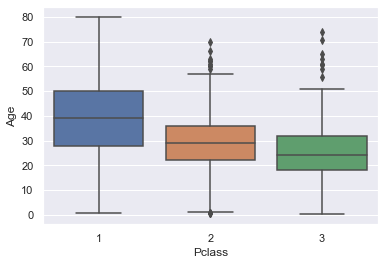

In [41]:
# Create a boxplot to view the correlated and medium of the Pclass and Title variables with Age.
# Boxplot b/w Pclass and Age
sns.boxplot(y='Age', x='Pclass', data=merged)

<AxesSubplot:xlabel='Title', ylabel='Age'>

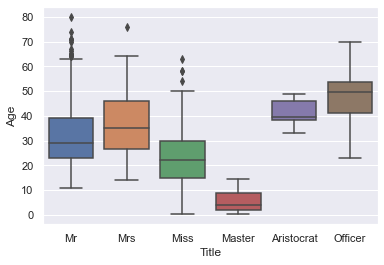

In [42]:
# Boxplot b/w Title and Age
sns.boxplot(y='Age', x='Title', data=merged)

In [43]:
# Impute Age with median of respective columns (i.e., Title and Pclass)
merged['Age'] = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [44]:
# let's check the missing value again.
merged.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Family_size      0
dtype: int64

# Data Transformation 
In this section, we will transform our continuous variables. After that, redundant and useless features will be deleted. And finally categorical variables will be encoded into numerical to feed our machine learning models.

#### Binning Age

In [45]:
# Creating bin categories for Age 
label_names = ['infant', 'child', 'teenager','young_adult', 'adult', 'aged']

# Create range for each bin categrories of age
cut_points = [0,5,12,18,35,60,81]

#Create and view categorized Age with original Age.
merged['Age_binned'] = pd.cut(merged['Age'], cut_points, labels = label_names)

#Age with Categorized Age.
merged[['Age', 'Age_binned']].head(2)

,Age,Age_binned
0,22.0,young_adult
1,38.0,adult


####  Binning Fare

In [46]:
# Create bin categories for Fare
groups = ['low','medium','high','very_high']

# Create range for each bin categories of Fare
cut_points = [-1, 130, 260, 390, 520]

#Create and view categorized Fare with original Fare
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)

# Fare with Categorized Fare
merged[['Fare', 'Fare_binned']].head(2)

,Fare,Fare_binned
0,7.2500,low
1,71.2833,low


In [47]:
# checking the data type
merged.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Title            object
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

In [48]:
# Correcting data types, converting into categorical variables.
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']].astype('category')

In [49]:
# Due to merging there are NaN values in Survived for test set observations.
merged['Survived'] = merged['Survived'].dropna().astype('int') #Converting without dropping NaN throws an error

In [50]:
# Check if data types have been corrected
merged.dtypes

PassengerId       int64
Survived          int32
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

In [51]:
# let's see all the variables
merged.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,small,young_adult,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,small,adult,low


In [52]:
# droping the feature that would not be useful anymore
merged.drop(columns = ['Name', 'Age','SibSp', 'Parch','Fare'], inplace = True, axis = 1)
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin',
       'Embarked', 'Title', 'Family_size', 'Age_binned', 'Fare_binned'],
      dtype='object')

# Encoding Categorical Variables

In [53]:
# convert categotical data into dummies variables
merged = pd.get_dummies(merged, drop_first=True)
merged.head(2)

,PassengerId,Survived,Pclass_2,Pclass_3,Sex_male,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,...,Family_size_single,Family_size_small,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### Model Building and Evaluation

In [54]:
#Let's split the train and test set to feed machine learning algorithm.
train = merged.iloc[:891, :]
test  = merged.iloc[891:, :]

#Drop passengerid from train set and Survived from test set.'''
train = train.drop(columns = ['PassengerId'], axis = 1)
test = test.drop(columns = ['Survived'], axis = 1)

# setting the data as input and output for machine learning models
X_train = train.drop(columns = ['Survived'], axis = 1) 
y_train = train['Survived']

# Extract test set
X_test  = test.drop("PassengerId", axis = 1).copy()

# See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (891, 36)
Output Vector Dimension:  (891,)
Test Data Dimension:      (418, 36)


####  Training Model 
We would train 5 different classifiers for this binary classification problem.

In [55]:
# Now initialize all the classifiers object.

#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#2.KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#3.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 40)

#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 40, n_estimators = 100)

#5.Support Vector Machines
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

#6. XGBoost 
from xgboost import XGBClassifier
xgb = XGBClassifier(n_job = -1, random_state = 40)

In [56]:
# Create a function that returns train accuracy of different models.

def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy
    
# making the summary table of train accuracy.
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(knn), train_accuracy(dt), train_accuracy(rf), train_accuracy(svc), train_accuracy(xgb)]})
train_accuracy.index = ['LR', 'KNN','DT', 'RF', 'SVC', 'XGB']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

#Training Accuracy of the Classifiers
sorted_train_accuracy

[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Train_accuracy(%)
DT,89.79
RF,89.79
XGB,89.00
KNN,84.85
LR,83.95
SVC,79.91


- IN the above table, DT, RF, XGB, KNN models have highest train accuracy. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.

In [57]:
# Create a function that returns mean cross validation score for different models.
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    val_score = np.round(val_score*100, 2)
    return val_score

# making the summary table of cross validation accuracy.
val_score = pd.DataFrame({'val_score(%)':[val_score(lr), val_score(knn), val_score(dt), val_score(rf), val_score(svc), val_score(xgb)]})
val_score.index = ['LR', 'KNN','DT', 'RF', 'SVC', 'XGB']
sorted_val_score = val_score.sort_values(by = 'val_score(%)', ascending = False)

#cross validation accuracy of the Classifiers
sorted_val_score

[15:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_job" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_job" } might not be used.

  This could be a false al

,val_score(%)
LR,82.72
XGB,81.71
DT,81.26
RF,81.26
KNN,80.93
SVC,79.57


- In the above tabel, LR and KNN have the highest cross validation accuracy among the remaining models.

## Tuning Hyperparameters 
Now let's add Grid Search to all the classifiers with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.

In [58]:
# define all the model hyperparameters one by one first

# 1. For logistic regression
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 2, 4, 8 ,10)}

# 2. For KNN
knn_params = {'n_neighbors':[4,5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'p':[1,2]}

# 3. For DT
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[46]}
# 4. For RF
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[ 10, 30, 200, 400],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[46]}
# 5. For SVC
svc_params = {'C': [0.1, 1, 10,100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': [ 1, 0.1, 0.001, 0.0001]}

#6. For XGB
xgb_params = xgb_params_grid = {'min_child_weight': [1, 5],
                   'gamma': [0.04, 0, 0.1, 1.5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.46, 1.0],
                   'max_depth': [3, 7]}

In [59]:
# Create a function to tune hyperparameters of the selected models.
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, param_grid, verbose = 3, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [60]:
# Appling tune hyperparameters in the created funtion

# Tune LR hyperparameters.
tune_hyperparameters(lr, param_grid=lr_params)
lr_best_params, lr_best_score =  best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
LR Best Score: 82.95
And Best Parameters: {'C': 4.641588833612778, 'penalty': 'l2'}


C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82719101        nan 0.82945069        nan 0.8249563
        nan 0.8260799 ]
  warnings.warn(


In [61]:
# Tune KNN hyperparameters
tune_hyperparameters(knn, param_grid=knn_params)
knn_best_params, knn_best_score =  best_params, best_score


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [62]:
# Tune DT hyperparameters
tune_hyperparameters(dt, param_grid=dt_params)
dt_best_params, dt_best_score =  best_params, best_score

Fitting 10 folds for each of 462 candidates, totalling 4620 fits


In [63]:
# Tune RF hyperparameters
tune_hyperparameters(rf, param_grid=rf_params)
rf_best_params, rf_best_score =  best_params, best_score

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [64]:
# Tune SVC hyperparameters
tune_hyperparameters(svc, param_grid=svc_params)
svc_best_params, svc_best_score =  best_params, best_score

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [65]:
# Tune XGB hyperparameters
xgb_opt = XGBClassifier(learning_rate = 0.04, n_estimators = 500, 
                       silent = 1, nthread = -1, random_state = 101)
tune_hyperparameters(xgb_opt, param_grid=xgb_params)
xgb_best_params, xgb_best_score =  best_params, best_score

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[15:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




#### Retrain and Predict Using Optimized Hyperparameters 

In [66]:
# Instantiate the models with optimized hyperparameters.
lr  = LogisticRegression(**lr_best_params)
knn = KNeighborsClassifier(**knn_best_params)
dt  = DecisionTreeClassifier(**dt_best_params)
rf  = RandomForestClassifier(**rf_best_params)
svc = SVC(**svc_best_params)
xgb = XGBClassifier(**xgb_best_params)

In [67]:
# Train all the models with optimised hyperparameters
models = { 'LR': lr, 'KNN':knn,'DT':dt,'RF':rf, 'SVC':svc, 'XGB':xgb}

# 10-fold Cross Validation after Optimization
score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Accuracy: 82.9451 (+/- 3.4820) [LR]
Mean Accuracy: 82.1573 (+/- 2.7544) [KNN]
Mean Accuracy: 82.1536 (+/- 3.1626) [DT]
Mean Accuracy: 83.6155 (+/- 4.2922) [RF]
Mean Accuracy: 83.2784 (+/- 3.1887) [SVC]
Mean Accuracy: 83.0512 (+/- 3.3570) [XGB]


In [68]:
# Make prediction using all the trained models
model_prediction = pd.DataFrame({'LR':lr.predict(X_test), 'KNN':knn.predict(X_test), 'DT':dt.predict(X_test),'RF':rf.predict(X_test), 'SVC':svc.predict(X_test), 'XGB': xgb.predict(X_test)})

#All the Models Prediction 
model_prediction.head()

,LR,KNN,DT,RF,SVC,XGB
0,0,0,0,0,0,0
1,1,0,1,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,0


In [69]:
#Create a data frame to store base modles prediction 
base_prediction = model_prediction # we have already make the data frame above of all the models prediction

base_prediction.head()

,LR,KNN,DT,RF,SVC,XGB
0,0,0,0,0,0,0
1,1,0,1,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,0


Text(0.5, 1.0, 'Prediction correlation ammong the Base Models')

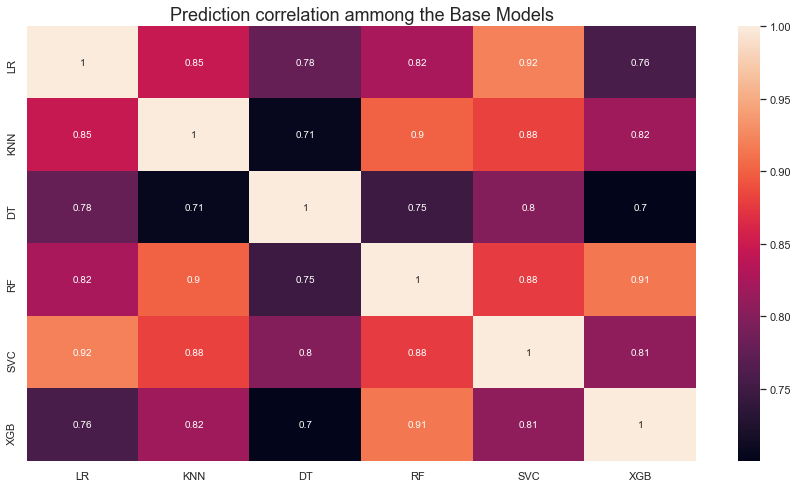

In [70]:
#Let's visualize the correlations among the predictions of base models.
plt.figure(figsize = (15,8))
sns.heatmap(base_prediction.corr(), annot=True)
plt.title('Prediction correlation ammong the Base Models', fontsize = 18)

#### Findings: The prediction looks quite similar for the 6 classifiers except when DT is compared to the others classifiers. Now we will create an ensemble with the base models RF, XGB, DT, KNN, and LR. This ensemble can be called heterogeneous ensemble since we have three tree based, one kernel based and one linear models. We would use EnsembleVotingClassifier method from mlxtend.classifier module for both hard and soft voting ensembles. The advantage is it requires lesser codes to plot decision regions and I find it a bit faster than sklearn's voting classifier.

In [71]:
# We will use mlxtend library to train, predict and plot decision regions of hard voting ensemble classifier
# Define base models for hard voting ensemble.
base_models = [lr, knn, dt, rf, xgb]


In [80]:
# Import ensemble classifier from mlxtend
from mlxtend.classifier import EnsembleVoteClassifier

In [78]:
!pip install mlxtend

  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)


In [81]:
# Initialize hard voting ensemble
hard_evc = EnsembleVoteClassifier(clfs= base_models, voting = 'hard')
print('Training Hard Voting Emsemble Classification')
display(hard_evc.fit(X_train, y_train))
print('-----Done-----')

# Predict with hard voting ensemble.
y_pred_hard_ecv = pd.DataFrame(hard_evc.predict(X_test), columns = ['HARD_ECV'])

# Hard voting cross validation score.
print('\nComputing Hard Voting Cross Val Score')
hard_x_val_score = cross_val_score(hard_evc, X_train, y_train, cv=10,  scoring = 'accuracy')
hard_x_val_score = np.round(hard_x_val_score.mean()*100,2)
print('----Done----')

# Compare hard voting score with best base models scores.
hard_vs_base_score = pd.DataFrame({'Hard_vs_base_score(%)': [hard_x_val_score, lr_best_score, knn_best_score, dt_best_score, rf_best_score, xgb_best_score]})
hard_vs_base_score.index = ['HARD_VAL_SCORE', 'LR', 'KNN', 'DT', 'RF', 'XGB']
display(hard_vs_base_score)

Training Hard Voting Emsemble Classification


EnsembleVoteClassifier(clfs=[LogisticRegression(C=4.641588833612778),
                             KNeighborsClassifier(algorithm='ball_tree',
                                                  n_neighbors=9, p=1),
                             DecisionTreeClassifier(max_features='log2',
                                                    min_samples_leaf=3,
                                                    min_samples_split=14,
                                                    random_state=46),
                             RandomForestClassifier(max_features='log2',
                                                    min_samples_leaf=2,
                                                    min_samples_split=6,
                                                    n_estimators=30,
                                                    random_state=46),
                             XGBC...
                                           eval_metric=None, gamma=1.5,
                               

-----Done-----

Computing Hard Voting Cross Val Score


C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----Done----


,Hard_vs_base_score(%)
HARD_VAL_SCORE,83.95
LR,82.95
KNN,82.16
DT,82.15
RF,83.62
XGB,83.16


In [82]:
# See base models prediction with hard voting prediction.
df_hard_base = pd.concat([base_prediction.drop('SVC', axis=1),y_pred_hard_ecv], sort = False, axis = 1)
display(df_hard_base.head(7))

,LR,KNN,DT,RF,XGB,HARD_ECV
0,0,0,0,0,0,0
1,1,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,0,1
5,0,0,0,0,0,0
6,1,1,1,1,1,1


### Soft Voting

In [83]:
# Example: how soft voting works
data = [[0.49, 0.99, 0.49, 0.66, 1],
        [0.51, 0.01, 0.51, 0.34, 0]]
display(pd.DataFrame(data, columns=['RF', 'LR', 'KNN', 'Average', 'Soft Voting']))

,RF,LR,KNN,Average,Soft Voting
0,0.49,0.99,0.49,0.66,1
1,0.51,0.01,0.51,0.34,0


In [84]:
#Let's implement soft voting ensemble in mlxtend.

# Base models for soft voting is the base models of hard voting
# Initialize soft voting ensemble
base_model = [lr, knn, dt, rf, xgb]
soft_evc = EnsembleVoteClassifier(clfs = base_model, voting = 'soft')
print('fitting soft voting ensemble')
display(soft_evc.fit(X_train, y_train))

fitting soft voting ensemble


EnsembleVoteClassifier(clfs=[LogisticRegression(C=4.641588833612778),
                             KNeighborsClassifier(algorithm='ball_tree',
                                                  n_neighbors=9, p=1),
                             DecisionTreeClassifier(max_features='log2',
                                                    min_samples_leaf=3,
                                                    min_samples_split=14,
                                                    random_state=46),
                             RandomForestClassifier(max_features='log2',
                                                    min_samples_leaf=2,
                                                    min_samples_split=6,
                                                    n_estimators=30,
                                                    random_state=46),
                             XGBC...
                                           gpu_id=-1, grow_policy='depthwise',
                        

In [85]:
#Predict with soft voting ensemble
y_pred_soft_evc = pd.DataFrame(soft_evc.predict(X_test), columns = ['SOFT_EVC'])

In [86]:
# Hard voting cross validation score
print('\nComputing Soft Voting X Val Score...')
soft_x_val_score = cross_val_score(soft_evc, X_train, y_train, cv = 10, scoring = 'accuracy')
soft_x_val_score = np.round(soft_x_val_score.mean()*100, 2)
print('----Done----')

# Compare Soft voting score with best base models scores.
soft_vs_base_score = pd.DataFrame({'Soft_Vs_Base_Score': [soft_x_val_score, lr_best_score, knn_best_score, dt_best_score, rf_best_score, xgb_best_score]})
soft_vs_base_score.index = ['SOFT_VAL_SCORE', 'LR', 'KNN', 'DT', 'RF', 'XGB']
display(hard_vs_base_score)


Computing Soft Voting X Val Score...


C:\Users\MANOHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----Done----


,Hard_vs_base_score(%)
HARD_VAL_SCORE,83.95
LR,82.95
KNN,82.16
DT,82.15
RF,83.62
XGB,83.16


### Soft voting perform better than all base model.